In [1]:
# Title:  Challenge: k-Means

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  car,           # For scatterplotMatrix
  cluster,       # Cluster analysis
  datasets,      # R's built-in sample datasets
  factoextra,    # Evaluate clusters
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

In [2]:
# LOAD AND PREPARE DATA ####################################

# Use the `iris` dataset from R's `datasets` package

?iris

iris {datasets},R Documentation


In [3]:
?iris

# Set random seed for reproducibility in processes like
# splitting the data
set.seed(1)  # You can use any number here

# Import data into `df`
df <- iris %>% tibble()

# Check data
df

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


iris {datasets},R Documentation


In [4]:
# Separate the class labels
Species <- df %>% 
  pull(Species)

df %<>%                  # Overwrite `df`
  select(-Species) %>%   # Select everything except `y`
  scale()                # Standardize variables

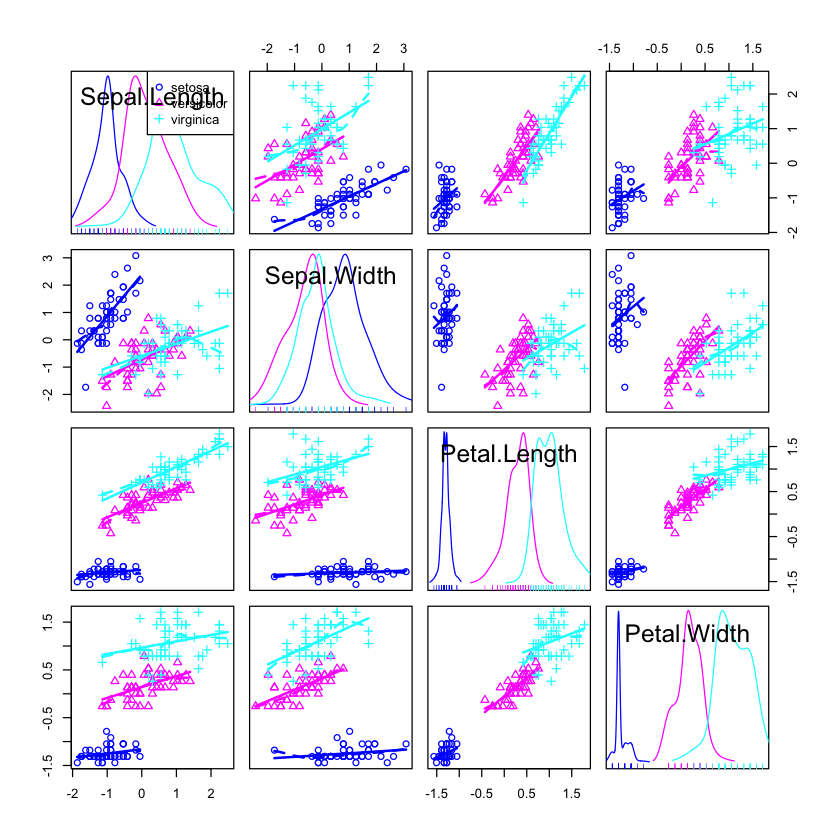

In [5]:
# EXPLORE DATA #############################################

# Make a scatter plot of some exploratory variables and
# color according to species (y)
scatterplotMatrix(
  ~ Sepal.Length +
    Sepal.Width +
    Petal.Length +
    Petal.Width | 
    Species,
  data = df
)

K-means clustering with 3 clusters of sizes 53, 47, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -0.05005221 -0.88042696    0.3465767   0.2805873
2   1.13217737  0.08812645    0.9928284   1.0141287
3  -1.01119138  0.85041372   -1.3006301  -1.2507035

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 [75] 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 44.08754 47.45019 47.35062
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


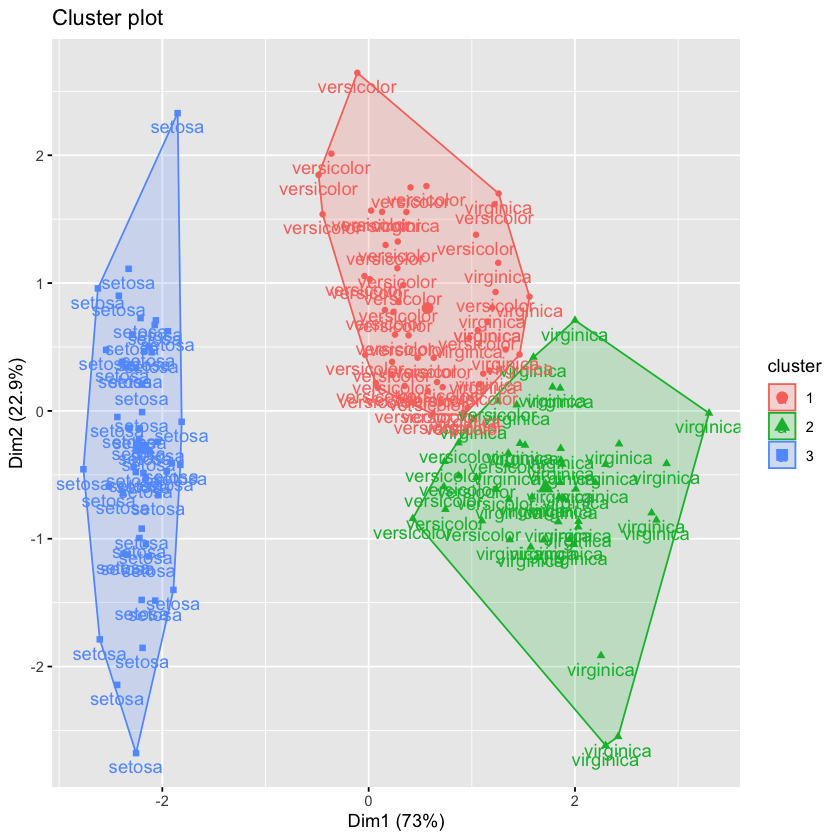

In [6]:
# K-MEANS CLUSTERING #######################################

# Compute three clusters
km <- df %>% 
  kmeans(3) %>%  # Set the number of clusters
  print()        # Print output

# Visualize the clusters
km %>% fviz_cluster(
  data = df,
  geom = c("point")
  ) +
  geom_text(
    vjust = 1.5,  # Color points according to cluster
    aes(
      color = as.factor(km$cluster),
      label = Species # label according to species
    )
  )